# FINAL REPORT

## th of Danceability and Energy on Popularity in Spotify's Music Landscape"

### INTRODUCTION

Music influences diverse aspects of human life and behaviour. Music streaming services, like spotify, have revolutionized the manner in which people consume music by providing a vast assortment of artists encompassing various genres and artistic origins. The question of what makes a song popular in this digital age has intrigued both music enthusiasts and researchers alike. Among the numerous factors contributing to a song's success, two key elements—danceability and energy—emerge as potential influencers. 

This project seeks to explore the statistical relationship between a song's danceability, energy, and its popularity on Spotify. We will be focusing on a dataset called "Top Spotify Songs 2023" available on KAGGLE. This dataset holds information on various Spotify songs, their artists, where they rank, and various other features like the year of release, tempo, energy, and danceability. Spotify is one of the world's leading music streaming service providers, with over 345 million users, including 155 million subscribers, across 178 countries.

#### Question: "Does the danceability and energy of a song contribute to its popularity on Spotify?"

The variables being examined in our research are danceability and energy, which are both continuous measures that range from low to high values. These features include certain musical components.
Danceability refers to the rhythmic components of a song that prompt physical movement and foster active participation from the listener. It encompasses elements like as tempo and rhythmic patterns, which determine a song's appropriateness for dancing or eliciting a physical reaction. Energy, however, comprises the strength and passion expressed in a musical performance. The track's emotional vitality, dynamics, and overall effect are reflected, which in turn influence the perceptions and engagement levels of listeners.
Both of them are believed to have an impact on audience preferences in modern digital environment.

##### Local Parameter: Mean

By computing the average danceability and energy ratings, we obtain a unique value that signifies the typical or average level of these characteristics among the songs in the dataset. This value serves as a crucial benchmark, enabling us to assess the overall patterns of rhythm and energy in the music accessible on Spotify. Analyzing the average danceability and energy ratings of songs or categories allows us to detect patterns or differences in musical attributes. 


##### Scale Parameter: Standard Deviation

The standard deviation quantifies the spread or dispersion of data points around the mean. In the context of danceability and energy ratings, it indicates how much individual song ratings deviate from the average within the dataset. Analyze the variability in danceability and energy ratings to gain a deeper understanding of the range of musical characteristics that influence the popularity of a song. It offers a measure of how much the popularity varies among songs within the same level of danceability or energy.

Through the mean, we aim to understand the average danceability and energy ratings of songs, providing insights into the predominant characteristics seen in the Spotify collection. Meanwhile, the standard deviation enables us to explore in further detail the extent to which these features vary and how this variation is connected to the popularity of a song.

### METHODS AND RESULTS

Before we begin, it's important to note that as defined in our project proposal, here are the two hypotheses:

**Null Hypothesis (H<sub>0</sub>):** There is no difference in the mean streaming count between different levels of danceability and energy.

**Alternative Hypothesis (H<sub>A</sub>):** There is a significant difference in the mean streaming count between different levels of danceability and energy.

First we have to load in the necessary libraries, read in the original data from the internet, and clean the data. The cleaned data is found in `spotify`.

In [18]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(broom)

spotify_original <- read_csv("https://drive.google.com/uc?export=download&id=1UQy2DuHB0IszFK4ZVgA20xDIWBHI4eTe")

spotify <- spotify_original %>%
    select("track_name", "streams", "danceability_%", "energy_%") %>%
    rename("danceability" = "danceability_%", "energy" = "energy_%") %>%
    mutate(streams = as.double(streams) / 1000000,
           danceability = as.integer(danceability), 
           energy = as.integer(energy)) %>%
    filter(if_all(everything(), ~!is.na(.)))

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `streams = as.double(streams)/1e+06`.
Caused by warning:
! NAs introduced by coercion”


Now, we're turning the energy and danceability columns into categorical variables, with each of energy and danceability being either high or low in equal proportion. These changes are implemented in a new object called `spotify_categorized`. 

In [19]:
half_boundary_energy <- spotify %>%
    select(energy) %>%
    pull() %>%
    quantile(1/2)

half_boundary_danceability <- spotify %>%
    select(danceability) %>%
    pull() %>%
    quantile(1/2)

spotify_categorized <- spotify %>%
    mutate(energy = cut(energy, breaks = c(0, half_boundary_energy, Inf), 
                                  labels = c("Low Energy", "High Energy")),
           danceability = cut(danceability, breaks = c(0, half_boundary_danceability, Inf), 
                                  labels = c("Low Danceability", "High Danceability")))

This is the preliminary results section that was found in the project proposal. It simply gives a visual representation of the distributions of streams, energy, and danceability in `combined_plot_hist` and it compares streams to each of those two variables in `combined_plot_scatter` as well so that we can eyeball how they might correlate.

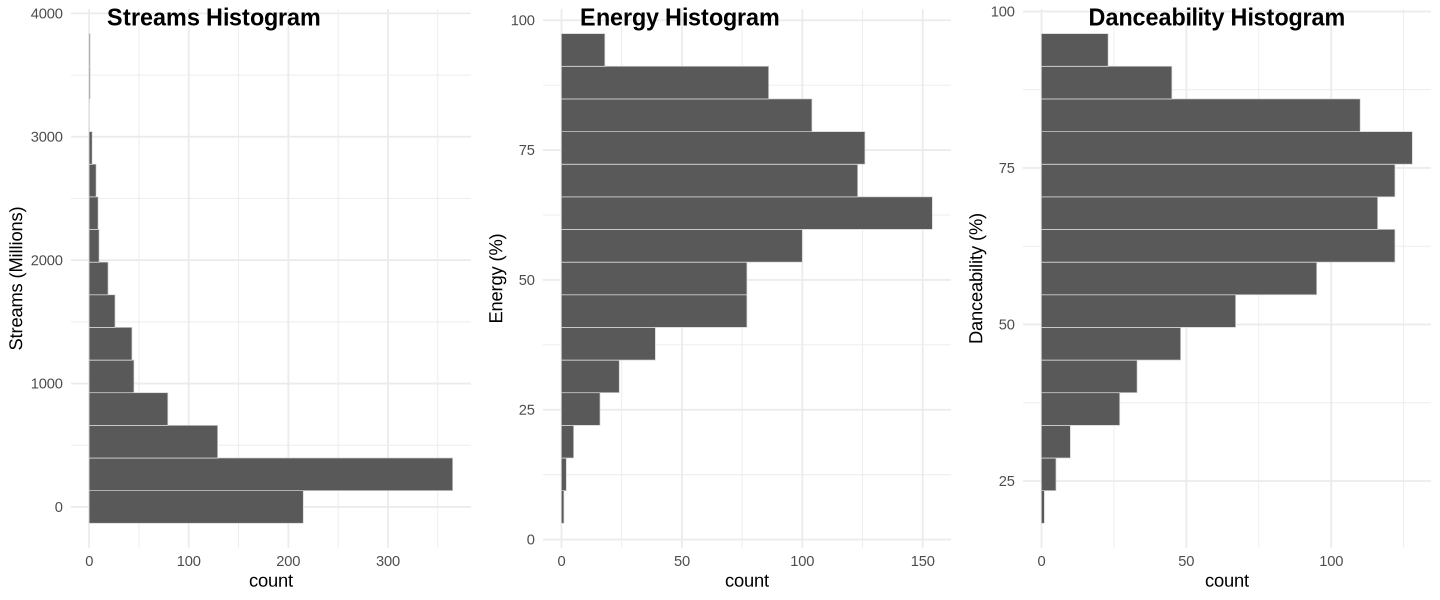

In [20]:
options(repr.plot.width = 12, repr.plot.height = 5)

spotify_vis_danceability_streams <- spotify %>%
    ggplot(aes(x = danceability, y = streams)) +
      geom_point(alpha = 0.3, shape = 16) +
      labs(x = "Danceability (%)", y = "Streams (Millions)") +
      theme_minimal()

spotify_vis_energy_streams <- spotify %>%
    ggplot(aes(x = energy, y = streams)) +
      geom_point(alpha = 0.3, shape = 16) +
      labs(x = "Energy (%)", y = "Streams (Millions)") +
      theme_minimal()

spotify_vis_energy <- spotify %>%
    ggplot(aes(y = energy)) +
        geom_histogram(bins = 15, color = "lightgray", linewidth = 0.2) +
        ylab("Energy (%)") +
        theme_minimal()

spotify_vis_danceability <- spotify %>%
    ggplot(aes(y = danceability)) +
        geom_histogram(bins = 15, color = "lightgray", linewidth = 0.2) +
        ylab("Danceability (%)") +
        theme_minimal()

spotify_vis_streams <- spotify %>%
    ggplot(aes(y = streams)) +
        geom_histogram(bins = 15, color = "lightgray", linewidth = 0.2) +
        ylab("Streams (Millions)") +
        theme_minimal()

combined_plot_scatter <- plot_grid(spotify_vis_danceability_streams, spotify_vis_energy_streams, 
                                   labels = c("Danceability vs Streams", "Energy vs Streams"), ncol = 1)

combined_plot_hist <- plot_grid(spotify_vis_streams, spotify_vis_energy, spotify_vis_danceability,
                                labels = c("Streams Histogram", "Energy Histogram", 
                                           "Danceability Histogram"), ncol = 3)

combined_plot_hist

Figure 1,2,3

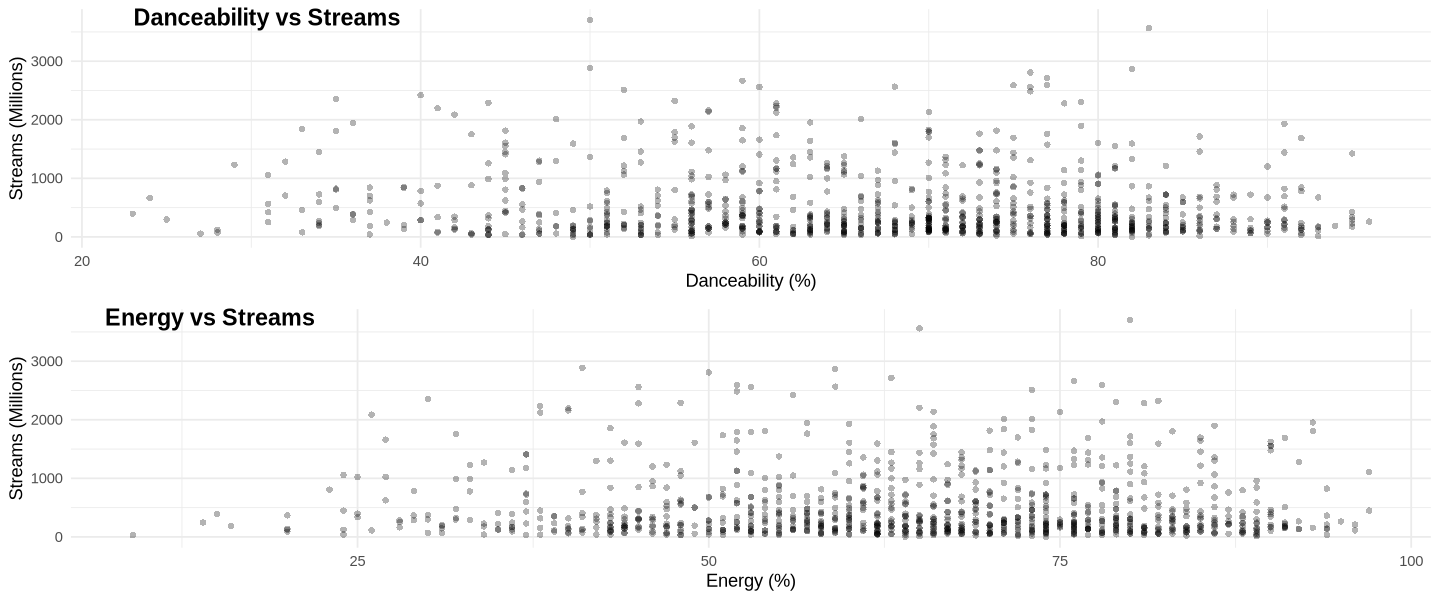

In [21]:
combined_plot_scatter

Figure 4,5

These visualizations show that the distributions of all three columns are fairly skewed, with the streams column being especially concentrated on the lower end. Additionally, the scatter plots comparing streams to energy and danceability are not conclusive on there own and don't reveal much about the data. Additional analysis will be required.

To get a basic numerical representation of these scatter plots, I created a table showing the mean, standard deviation, and variance of each category (high energy/low energy or high danceability/low danceability) compared to the streams.

In [22]:
streams_energy <- spotify_categorized %>%
    group_by(energy) %>%
    summarize(mean_streams = mean(streams),
              standard_deviation_streams = sd(streams),
              variance_streams = var(streams))

streams_danceability <- spotify_categorized %>%
    group_by(danceability) %>%
    summarize(mean_streams = mean(streams),
              standard_deviation_streams = sd(streams),
              variance_streams = var(streams))

streams_energy

energy,mean_streams,standard_deviation_streams,variance_streams
<fct>,<dbl>,<dbl>,<dbl>
Low Energy,533.0476,591.7409,350157.3
High Energy,493.6548,538.5070,289989.8


Table 1

In [23]:
streams_danceability

danceability,mean_streams,standard_deviation_streams,variance_streams
<fct>,<dbl>,<dbl>,<dbl>
Low Danceability,555.0518,597.3977,356884.1
High Danceability,472.3544,531.2570,282234.0


Table 2

Interestingly, these tables seem to suggest that songs with lower energy might statistically have lower streams than songs with higher energy, with the same being true for danceability. This is not at all what we expected. Additionally, the variances of each of the categories are not many times greater or less than each other, and as such they can be treated as having equal variances for the purposes of conducting t-tests.

Next, we took bootstrap distributions of the mean streams of songs in both values (high/low) of each category (energy/danceability), and found 95% confidence intervals for each of them.

In [24]:
streams_bootstrap_means_low_energy <- spotify_categorized %>%
    filter(energy == "Low Energy") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_low_energy <- streams_bootstrap_means_low_energy %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "Low Energy")

streams_bootstrap_means_hist_low_energy <- streams_bootstrap_means_low_energy %>%
    ggplot(aes(x=stat)) + 
    geom_histogram(bins = 30) +
    annotate("rect", xmin=-Inf, xmax=streams_ci_low_energy %>% pull(lower_ci), ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    annotate("rect", xmin=streams_ci_low_energy %>% pull(upper_ci), xmax=Inf, ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    ggtitle("Low Energy Streams Sampling Distribution of Bootstrap Means") +
    labs(x="Mean", y="Count") +
    theme(text = element_text(size=20))

streams_bootstrap_means_high_energy <- spotify_categorized %>%
    filter(energy == "High Energy") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_high_energy <- streams_bootstrap_means_high_energy %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "High Energy")

streams_bootstrap_means_hist_high_energy <- streams_bootstrap_means_high_energy %>%
    ggplot(aes(x=stat)) + 
    geom_histogram(bins = 30) +
    annotate("rect", xmin=-Inf, xmax=streams_ci_high_energy %>% pull(lower_ci), ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    annotate("rect", xmin=streams_ci_high_energy %>% pull(upper_ci), xmax=Inf, ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    ggtitle("High Energy Streams Sampling Distribution of Bootstrap Means") +
    labs(x="Mean", y="Count") +
    theme(text = element_text(size=20))

streams_bootstrap_means_low_danceability <- spotify_categorized %>%
    filter(danceability == "Low Danceability") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_low_danceability <- streams_bootstrap_means_low_danceability %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "Low Danceability")

streams_bootstrap_means_hist_low_danceability <- streams_bootstrap_means_low_danceability %>%
    ggplot(aes(x=stat)) + 
    geom_histogram(bins = 30) +
    annotate("rect", xmin=-Inf, xmax=streams_ci_low_danceability %>% pull(lower_ci), ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    annotate("rect", xmin=streams_ci_low_danceability %>% pull(upper_ci), xmax=Inf, ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    ggtitle("Low Danceability Streams Sampling Distribution of Bootstrap Means") +
    labs(x="Mean", y="Count") +
    theme(text = element_text(size=20))

streams_bootstrap_means_high_danceability <- spotify_categorized %>%
    filter(danceability == "High Danceability") %>%
    specify(response = streams) %>%
    generate(reps = 4000, type = "bootstrap") %>%
    calculate(stat = "mean")

streams_ci_high_danceability <- streams_bootstrap_means_high_danceability %>%
    get_ci(level = 0.95, type = "percentile") %>%
    mutate(category = "High Danceability")

streams_bootstrap_means_hist_high_danceability <- streams_bootstrap_means_high_danceability %>%
    ggplot(aes(x=stat)) + 
    geom_histogram(bins = 30) +
    annotate("rect", xmin=-Inf, xmax=streams_ci_high_danceability %>% pull(lower_ci), ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    annotate("rect", xmin=streams_ci_high_danceability %>% pull(upper_ci), xmax=Inf, ymin=-Inf, ymax=Inf, fill="red", alpha=0.2) +
    ggtitle("High Danceability Streams Sampling Distribution of Bootstrap Means") +
    labs(x="Mean", y="Count") +
    theme(text = element_text(size=20))

ci <- bind_rows(streams_ci_low_energy, streams_ci_high_energy, streams_ci_low_danceability, streams_ci_high_danceability) %>%
    select(category, everything())

ci

category,lower_ci,upper_ci
<chr>,<dbl>,<dbl>
Low Energy,482.4621,585.0376
High Energy,445.5532,543.8605
Low Danceability,503.6389,609.3377
High Danceability,425.6226,522.2227


Table 3

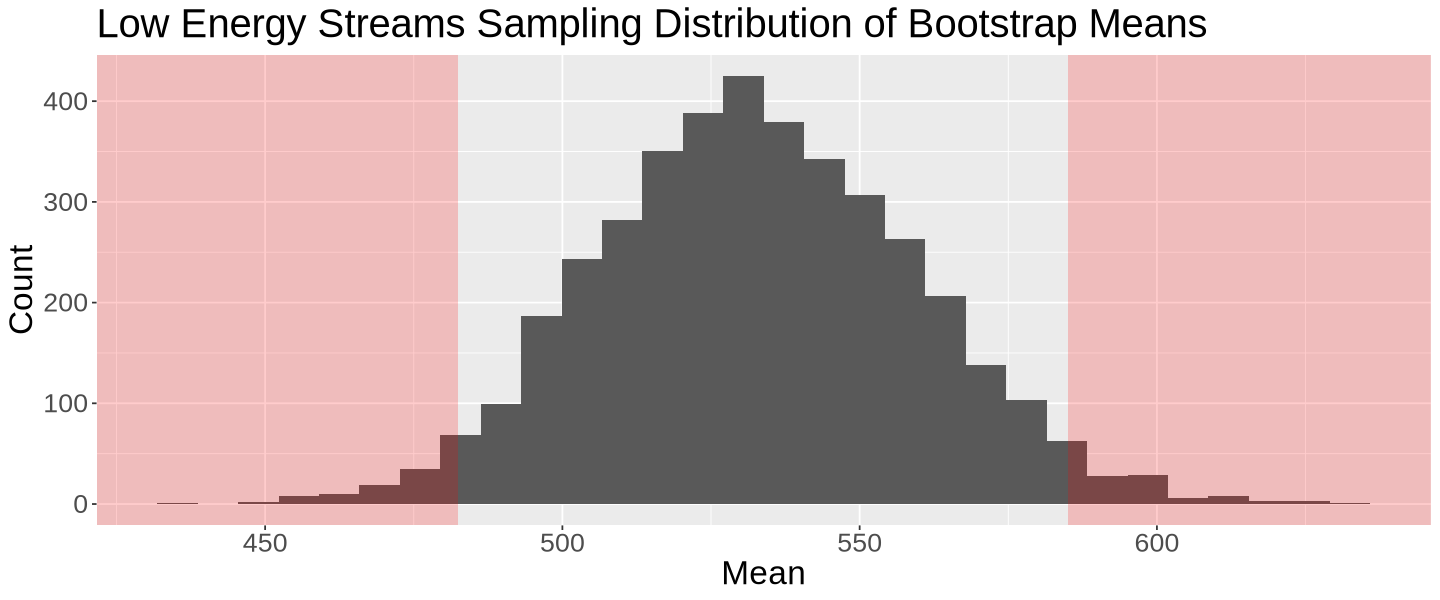

In [25]:
streams_bootstrap_means_hist_low_energy

Figure 6

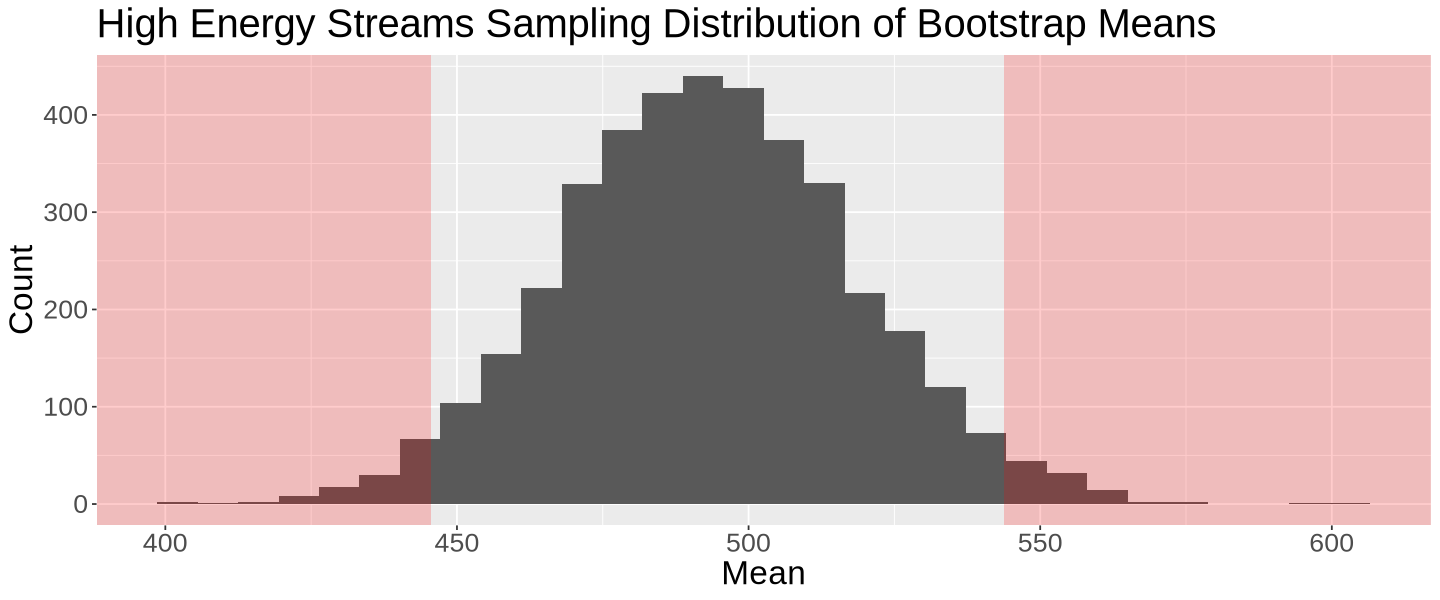

In [26]:
streams_bootstrap_means_hist_high_energy

Figure 7

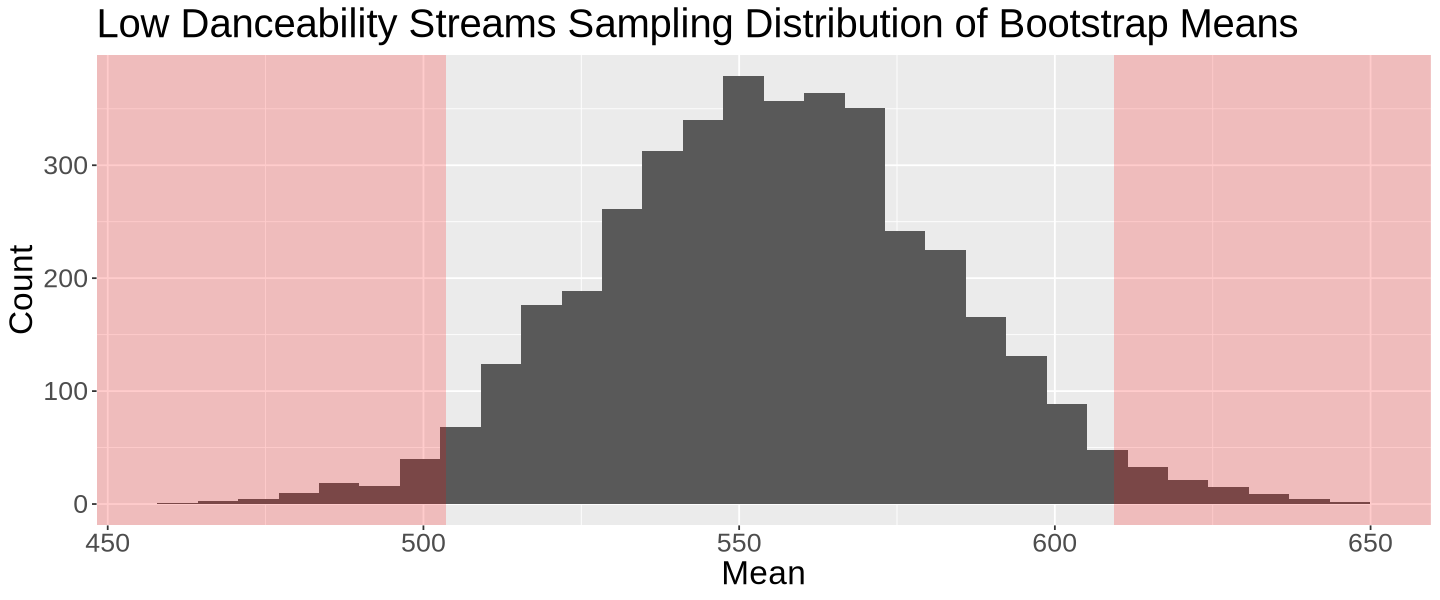

In [27]:
streams_bootstrap_means_hist_low_danceability

Figure 8

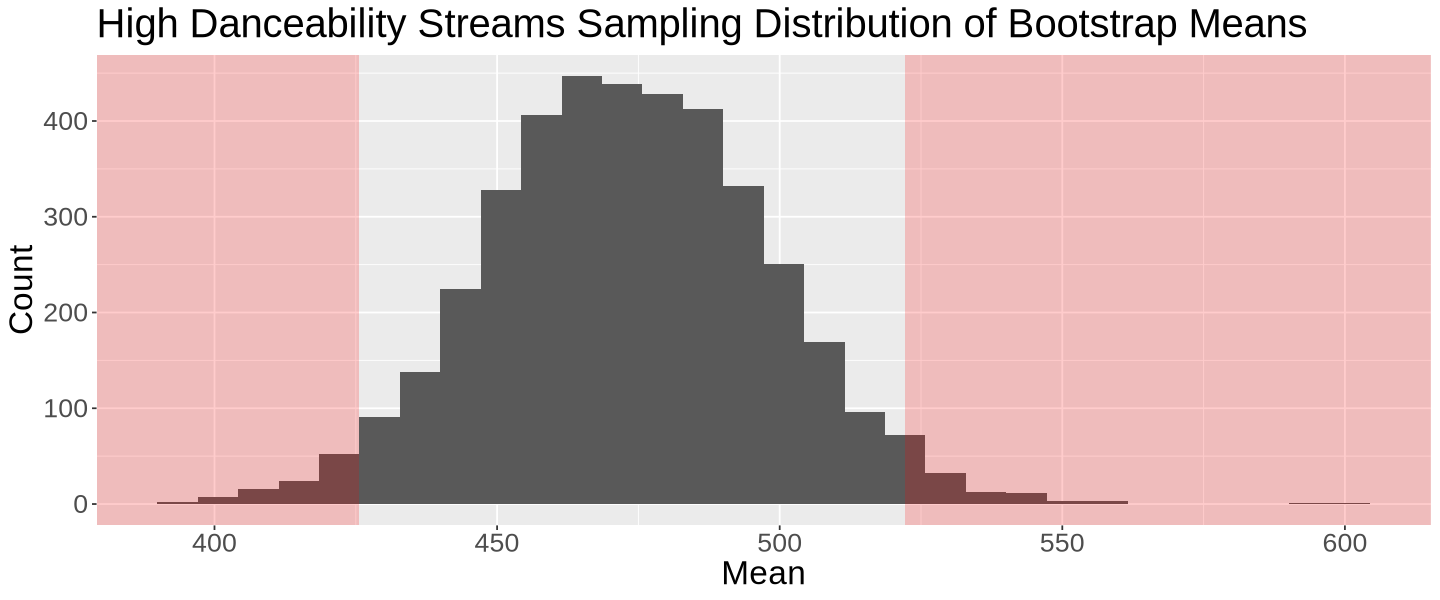

In [28]:
streams_bootstrap_means_hist_high_danceability

Figure 9

Again, here we see a trend toward low energy or low danceability songs getting more streams then their high energy equivalents, but this visual analysis is not enough to come to a statistical conclusion.

One of the most rigorous test we can perform is a two-sample t-test, which we can use to compare the means between low and high energy, as well as the means between low and high danceability. In our project proposal, we defined our alpha value at 0.05.

In [29]:
danceability_t_test <- 
   t.test(streams ~ danceability, data = spotify_categorized, 
              var.equal = TRUE) %>% 
  tidy()

danceability_p_value <- danceability_t_test %>%
    pull(p.value)

energy_t_test <- 
   t.test(streams ~ energy, data = spotify_categorized, 
              var.equal = TRUE) %>% 
  tidy()

energy_p_value <- energy_t_test %>%
    pull(p.value)

results <- tibble(category = c("Energy", "Danceability"), 
                  p_value = c(energy_p_value, danceability_p_value), 
                  alpha = c(0.05, 0.05), 
                  reject_null_hypothesis = p_value < alpha)

cat("Energy t-test results:")
energy_t_test

Energy t-test results:

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39.39278,533.0476,493.6548,1.07132,0.2842978,950,-32.76768,111.5532,Two Sample t-test,two.sided


Table 4

In [30]:
cat("\nDanceability t-test results:")
danceability_t_test


Danceability t-test results:

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
82.69745,555.0518,472.3544,2.255352,0.02433813,950,10.73937,154.6555,Two Sample t-test,two.sided


Table 5

In [31]:
results

category,p_value,alpha,reject_null_hypothesis
<chr>,<dbl>,<dbl>,<lgl>
Energy,0.28429777,0.05,FALSE
Danceability,0.02433813,0.05,TRUE


Table 6

Interestingly, the t-tests revealed that while danceability has a p-value lower than 0.05, suggesting a likely statistically significant relationship between danceability and streams, energy does not, suggesting that the trend towards low-energy songs we saw in the visualizations earlier may have due to random chance.

#### Bootstrapping vs Asymptotics

In our research, 


### DISCUSSION

- Summarize what you found, and the implications/impact of your findings.
- If relevant, discuss whether your results were what you expected to find.
- Discuss future questions/research this study could lead to.


### REFERENCES

Al-Beitawi, Z., Salehan, M., & Zhang, S. (2020). What makes a song trend? cluster analysis of musical attributes for spotify top trending songs. Journal of Marketing Development and Competitiveness, 14(3), 79-91. Retrieved from https://www.proquest.com/scholarly-journals/what-makes-song-trend-cluster-analysis-musical/docview/2444523984/se-2



Elgiriyewithana, N. (2023, September). Most Streamed Spotify Songs 2023. https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023



Vardo, L., Jerkić, J., & Žunić, E. (2023a). Predicting song success: Understanding track features and predicting popularity using Spotify Data. 2023 22nd International Symposium INFOTEH-JAHORINA (INFOTEH). https://doi.org/10.1109/infoteh57020.2023.10094172